# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

# Read the excel file
df =  pd.read_excel('Data.xlsx')

# Exploratory data analysis

In [2]:
# Checking shape of the dataframe
df.shape

(10683, 11)

In [3]:
# Checking first 5 rows of dataframe
df.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
# Checking datatype of all features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Converting price feature from int64 to int32
df['Price'] = df['Price'].astype(np.int32)

In [10]:
# Checking percentage of missing values
df.isnull().mean()*100

Airline            0.000000
Date_of_Journey    0.000000
Source             0.000000
Destination        0.000000
Route              0.009361
Dep_Time           0.000000
Arrival_Time       0.000000
Duration           0.000000
Total_Stops        0.009361
Additional_Info    0.000000
Price              0.000000
dtype: float64

In [11]:
# Let's check any duplicated values
df.duplicated().sum()

220

Donw below are all the questions which are coming in my mind while looking at the dataset

1. Which airline have high ticket prices ?
2. Is there any relation between Total_stops and Price
3. Which airline mostly have less number of stops ?
4. How price vary with the duration ?
5. From the source location, what are some most frequently visited Desitnation ?

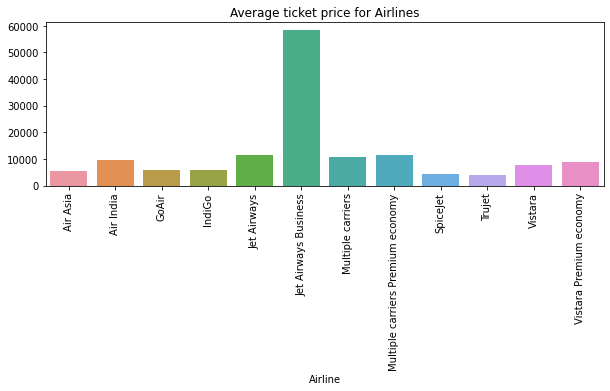

In [13]:
# Which Airline have most costly price of tickets
fig, ax = plt.subplots(figsize=(10, 3))

temp1 = df.groupby('Airline')['Price'].mean()
sns.barplot(x=temp1.index, y=temp1.values, ax=ax).set(title='Average ticket price for Airlines')
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
plt.show()

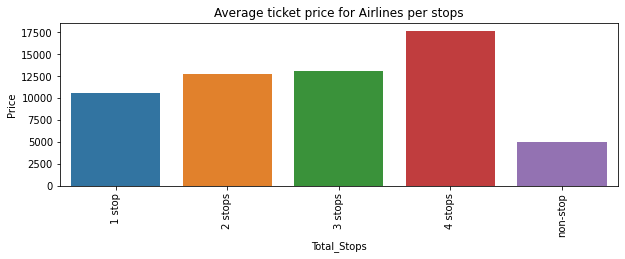

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))

temp2 = df.groupby('Total_Stops')['Price'].mean()
sns.barplot(x=temp2.index, y=temp2.values, ax=ax).set(title='Average ticket price for Airlines per stops')
ax.set_xticklabels(ax.get_xticklabels(), rotation='vertical')
ax.set_ylabel('Price')
plt.show()

# Data processing and feature engineering

### Imputing the missing values
In route and Total_stops feature there are some missing values present so we will perform mode value imputation to handle the missing values present in the variables.

### Encoding categorical features
Out of all the categorical features : Airline,Source,Destination and Additional_Info are nominal cateogircal variabels. On the other hand Total_stops is oridnal categorical variable. Thus for the nominal features we will do one hot encoding and for the ordianl variables we will do ordinal encoding.

In [15]:
# Let's do mode value imputation
Nan_cols = [col for col in df.columns if df[col].isnull().mean()*100 >0 and df[col].isnull().mean()*100 <5]
for col in Nan_cols:
    df[col] = df[col].fillna(df[col].mode().values[0])

In [16]:
df['Additional_Info'] = df['Additional_Info'].replace(to_replace = 'No info',value='no info')

In [17]:
# Let's encode nominal categorical variables using one hot encoding
df = pd.get_dummies(data = df,columns = ['Airline','Source','Destination','Additional_Info'],sparse=False,drop_first=True)

In [18]:
# Let's do oridnal encoding of Total_Stops feature
map_total_stops = {'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'non-stop':5}
df['Total_Stops'] = df['Total_Stops'].map(map_total_stops)

In [19]:
# Dropping features that are unnecesary 
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Route'],axis=1,inplace=True)

In [20]:
duration_in_mins = []
for i in df['Duration']:
    if len(i.split()) == 2:
        time = i.split()
        duration_in_mins.append(int(time[0][:-1])*60 + int(time[1][:-1]))
    else:
        if i[-1] == 'h':
            duration_in_mins.append(int(i[:-1])*60)
        elif i[-1] == 'm':
            duration_in_mins.append(int(i[:-1]))

# Let's create new features
df['duration_in_mins'] = duration_in_mins
df.drop(['Duration'],axis=1,inplace=True)

<AxesSubplot:>

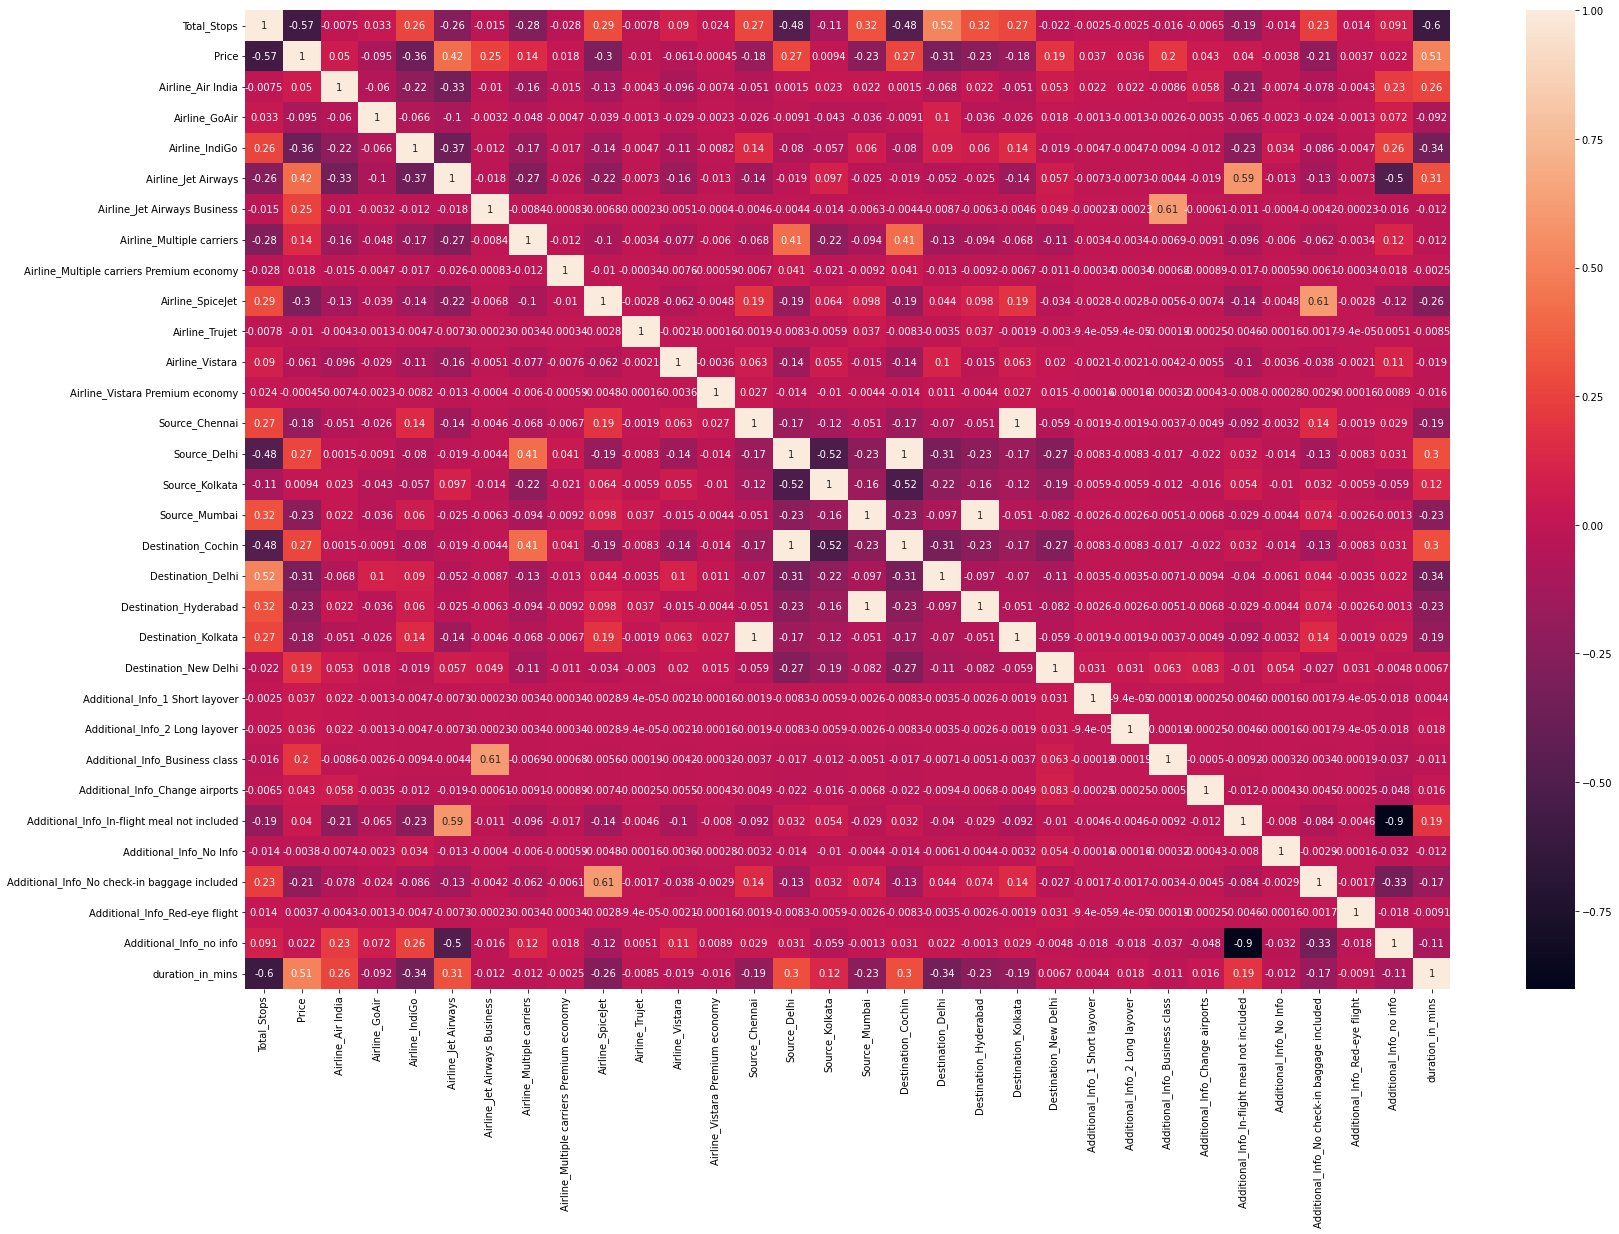

In [21]:
fig,ax = plt.subplots(figsize=(27,18))
sns.heatmap(df.corr(),annot=True)

In [22]:
# Let's create an object of StandardScaler class for doing feature scaling
scaler = StandardScaler()
y = df['Price']
X = df.drop(['Price'],axis=1)

In [23]:
# Doing train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)

In [24]:
# Let's normalize the data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training

In summary, you should use polynomial regression when there is a non-linear relationship between the independent and dependent variables, and use Ridge or Lasso regression when there is multicollinearity between independent variables, and based on the level of importance of the independent variables you can choose which type of regression to use.

There are a few ways to determine if the relationship between the dependent and independent variables is nonlinear:

1. Visual inspection: Plot the independent variable(s) against the dependent variable using a scatter plot. If the relationship appears curved or nonlinear, this is a good indication that a linear model may not be appropriate.

2. Residual plots: Plot the residuals (the difference between the predicted values and the actual values) against the fitted values. If the residuals are not randomly distributed around zero, or if they show a pattern, this may indicate a nonlinear relationship.

3. Statistical tests: Use a statistical test, such as the F-test, to determine if adding polynomial terms to the model significantly improves the fit. Another approach is to use a nonparametric regression method, such as kernel regression or local regression, to model the data without assuming a linear relationship.

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
# Let's create an object of MultipleLR class
lr = LinearRegression()

In [27]:
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
# Making predictions
y_pred = lr.predict(X_test)

# Model evaluation

In [29]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("R2 score",r2_score(y_test,y_pred))

MAE 1844.4138744155289
MSE 7264862.474166654
R2 score 0.6513532276361012
